In [1]:
!git clone https://github.com/openvinotoolkit/openvino

fatal: destination path 'openvino' already exists and is not an empty directory.


In [2]:
!python3 -m pip install openvino-dev

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

#import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plb
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

2023-07-14 08:54:25.421956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#load fashion MNIST dataset
fashion_mnist=keras.datasets.fashion_mnist
#load and preprocess data
(traind,trainl),(testd,testl)=fashion_mnist.load_data()
#printing details of the dataset
print("Train data:",traind.shape)
print("Test data:",testd.shape)

Train data: (60000, 28, 28)
Test data: (10000, 28, 28)


In [5]:
#scaling the pixel values
traind=traind/255.0
testd=testd/255.0

In [6]:
model = keras.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='leaky_relu'))

# Flatten the feature maps
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

2023-07-14 08:54:34.850744: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [7]:
#compiling the model 
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#training the model
history=model.fit(traind, trainl, epochs=15, batch_size=150, verbose=1, validation_data=(testd, testl))
#evaluating the model
test_loss,test_accuracy = model.evaluate(testd,testl,verbose = 0)
print("Test accuracy:",test_accuracy)

Epoch 1/15
400/400 [==============================] - 43s 105ms/step - loss: 0.6437 - accuracy: 0.7538 - val_loss: 0.4351 - val_accuracy: 0.8359
Epoch 2/15
400/400 [==============================] - 40s 101ms/step - loss: 0.3864 - accuracy: 0.8570 - val_loss: 0.3425 - val_accuracy: 0.8730
Epoch 3/15
400/400 [==============================] - 40s 101ms/step - loss: 0.3287 - accuracy: 0.8792 - val_loss: 0.3114 - val_accuracy: 0.8878
Epoch 4/15
400/400 [==============================] - 40s 100ms/step - loss: 0.2982 - accuracy: 0.8889 - val_loss: 0.2785 - val_accuracy: 0.8994
Epoch 5/15
400/400 [==============================] - 39s 97ms/step - loss: 0.2761 - accuracy: 0.8982 - val_loss: 0.2748 - val_accuracy: 0.8981
Epoch 6/15
400/400 [==============================] - 39s 99ms/step - loss: 0.2584 - accuracy: 0.9036 - val_loss: 0.2638 - val_accuracy: 0.9017
Epoch 7/15
400/400 [==============================] - 41s 102ms/step - loss: 0.2466 - accuracy: 0.9071 - val_loss: 0.2504 - val_accu

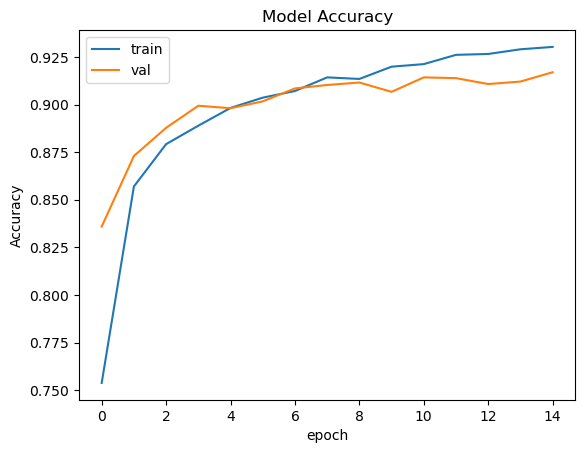

In [8]:
# Accuracy vs Epoch plot
plb.plot(history.history['accuracy'])
plb.plot(history.history['val_accuracy'])
plb.title('Model Accuracy')
plb.ylabel('Accuracy')
plb.xlabel('epoch')
plb.legend(['train', 'val','test'], loc='upper left')
plb.show()

In [9]:
# Save the model
model.save("model.h5")

In [10]:
# Make predictions
predictions = model.predict(testd)
predicted_labels=np.argmax(predictions, axis=1)
print("predictions:",predicted_labels)

313/313 [==============================] - 4s 11ms/step
predictions: [9 2 1 ... 8 1 5]


In [11]:
#printing the predictions 
print("prediction  target")
for x in np.arange(50):
    print(predicted_labels[x],testl[x])

prediction  target
9 9
2 2
1 1
1 1
0 6
1 1
4 4
6 6
5 5
7 7
4 4
5 5
7 7
3 3
4 4
1 1
2 2
4 4
8 8
0 0
2 2
5 5
7 7
5 9
1 1
4 4
6 6
0 0
9 9
3 3
8 8
8 8
3 3
3 3
8 8
0 0
7 7
5 5
7 7
9 9
6 6
1 1
6 3
9 7
6 6
7 7
2 2
1 1
6 2
6 2


In [12]:
cm = confusion_matrix(testl, predicted_labels)

# Calculate classification report
report = classification_report(testl, predicted_labels)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[844   1  19  24   4   1 101   0   6   0]
 [  0 975   3  14   3   0   3   0   2   0]
 [ 14   0 858  11  63   0  54   0   0   0]
 [  5   5   5 939  21   0  25   0   0   0]
 [  0   1  23  27 874   0  75   0   0   0]
 [  0   0   0   0   0 982   0  16   0   2]
 [ 77   1  55  22  55   0 781   0   9   0]
 [  0   0   0   0   0   3   0 975   0  22]
 [  2   0   3   1   3   2   4   4 981   0]
 [  0   0   0   0   0   4   1  34   0 961]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.89      0.86      0.87      1000
           3       0.90      0.94      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.99      0.98      0.99      1000
           6       0.75      0.78      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0

In [13]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')
tf.saved_model.save(model,'model')

2023-07-14 09:06:12.377845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2023-07-14 09:06:12.389438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2023-07-14 09:06:12.407176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-07-

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [14]:
!mo --saved_model_dir model

/bin/bash: mo: command not found
